In [42]:
#import pandas
import pandas as p

In [43]:
#menyiapkan data frame
ds = p.DataFrame(
    {"a" : [4 ,5, 6],
    "b" : [7, 8, 9],
    "c" : [10, 11, 12]},
        index = [1, 2, 3])

#menampilkan dataframe
print(ds)

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12


In [44]:
#menyiapkan data frame
df = p.DataFrame([[3, 4], [5, 6]])

#menambahkan baris baru
a_row = p.Series([1, 2])
row_df = p.DataFrame([a_row])

#menggabungkan baris baru ke dataset
df = p.concat([row_df, df])

#menampilkan dataframe
print(df)

   0  1
0  1  2
0  3  4
1  5  6


In [45]:
#nama file Excel, digunakan di banyak fungsi
excel_file = 'movies.xls'

#membuat dataframe
movies = p.read_excel(excel_file)

In [46]:
#menampilkan data teratas (defaultnya 5)
movies.head()

#menampilkan data terbawah (defaultnya 5)
movies.tail()

#mengecek ukuran dataset (deafultnya hanya untuk sheet pertama)
movies.shape

#mengecek data dari baris spesifik
movies.loc[186]

Title                             The Exorcist 
Year                                       1973
Genres                                   Horror
Language                                English
Country                                     USA
Content Rating                                R
Duration                                    132
Aspect Ratio                               1.37
Budget                                8000000.0
Gross Earnings                      204565000.0
Director                       William Friedkin
Actor 1                           Ellen Burstyn
Actor 2                             Linda Blair
Actor 3                             Lee J. Cobb
Facebook Likes - Director                   607
Facebook Likes - Actor 1                   1000
Facebook Likes - Actor 2                    931
Facebook Likes - Actor 3                  259.0
Facebook Likes - cast Total                2466
Facebook likes - Movie                    18000
Facenumber in posters                   

In [47]:
#mengimport sheet spesifik
movies_1 = p.read_excel(excel_file, sheet_name=0, index_col=0)
movies_2 = p.read_excel(excel_file, sheet_name=1, index_col=0)
movies_3 = p.read_excel(excel_file, sheet_name=2, index_col=0)

#menampilkan sheet spesifik
movies_1.shape
movies_3.shape
movies_2.shape

(2100, 24)

In [48]:
#menggabungkan tiga buah dataset
movies_all = p.concat([movies_1, movies_2, movies_3])

#mengecek ukuran dataset gabungan
movies_all.shape

(5042, 24)

In [49]:
#mengimpor banyak sheet ke satu dataset
#dapat menggunakan nama file Excel atau excel_file yang sudah didefinisikan di awal
xlsx = p.ExcelFile(excel_file)

#menggabungkan seluruh sheet yang baru diimport
movies_sheets = []
for sheet in xlsx.sheet_names:
   movies_sheets.append(xlsx.parse(sheet))
movies_all2 = p.concat(movies_sheets)

#mengecek ukuran dataset baru
movies_all2.shape

(5042, 25)

In [50]:
#mengekspor dataframe/dataset ke dalam file Excel di folder yang sama
movies_all2.to_excel("Film.xlsx")

In [51]:
#pengurutan berdasarkan pendapatan kotor
movies_sort_gross = movies.sort_values(['Gross Earnings'], ascending=False)

#menampilkan dataset yang sudah diurutkan
movies_sort_gross.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1027,Titanic,1997,Drama|Romance,English,USA,PG-13,194,2.35,200000000.0,658672302.0,...,29000,14000,794.0,45223,26000,0,793059,2528,315.0,7.7
1281,Star Wars: Episode I - The Phantom Menace,1999,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG,136,2.35,115000000.0,474544677.0,...,20000,14000,1000.0,37723,13000,1,534658,3597,320.0,6.5
226,Star Wars: Episode IV - A New Hope,1977,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG,125,2.35,11000000.0,460935665.0,...,11000,1000,504.0,13485,33000,1,911097,1470,282.0,8.7
328,E.T. the Extra-Terrestrial,1982,Family|Sci-Fi,English,USA,PG,120,1.85,10500000.0,434949459.0,...,861,725,548.0,2811,34000,0,281842,515,215.0,7.9
737,The Lion King,1994,Adventure|Animation|Drama|Family|Musical,English,USA,G,73,1.66,45000000.0,422783777.0,...,2000,886,847.0,6458,17000,0,644348,656,186.0,8.5


In [52]:
#import library untuk membuat plot
import matplotlib.pyplot as plt

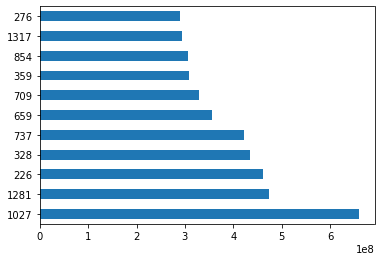

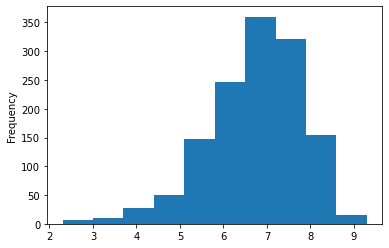

In [53]:
#membuat bar chart untuk total pendapatan kotor
movies_sort_gross['Gross Earnings'].head(11).plot(kind="barh")
plt.show()

#membuat histogram untuk rata-rata skor IMDB
movies['IMDB Score'].plot(kind="hist")
plt.show()

In [54]:
#menampilkan statistik dasar
movies_all2.describe()

#melakukan operasi pada data
movies_all2['Net Earnings'] = movies_all2['Gross Earnings'] - movies_all2['Budget']

#menampilkan statistik secara sepesifik
movies_all2['Net Earnings'].mean()

5844716.964790543

In [55]:
#import numpy
import numpy as np

In [56]:
#membuat dataframe baru
df_new = p.read_excel("movies.xls")

#menghitung jumlah film yang tidak memiliki pendapatan kotor
df_new['Gross Earnings'].isnull().sum()

#menghapus kolom
to_drop = ['Country']
df_new.drop(to_drop, inplace=True, axis=1)

#menampilkan dataset yang sudah didrop
df_new.head()

,Title,Year,Genres,Language,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,Not Rated,151,1.33,245000.0,NaN,King Vidor,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
